<a href="https://colab.research.google.com/github/rishabhpurohit/NLP-Basics-Project/blob/master/COVID_19_TWITTER_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import warnings
import re

#Visualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


warnings.filterwarnings("ignore")
%matplotlib inline

from plotly.offline import iplot
import plotly as py

import plotly.tools as tls
import cufflinks as cf

py.offline.init_notebook_mode(connected = True)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
text = r"/content/tweets_corona.txt"
splitLine = []
oFile = open(text, 'r')
line = oFile.readline()
while line:
    splitLine.append(line.split('\n'))
    line = oFile.readline()
oFile.close()

In [0]:
tweets = []
for sublist in splitLine:
    for item in sublist:
        tweets.append(item)

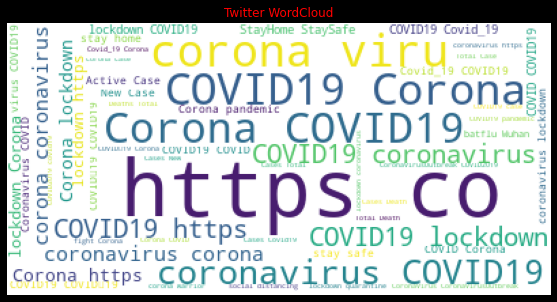

In [0]:
def word_cloud(tweets):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 2016).generate(" ".join([tw for tw in tweets]))
  plt.figure( figsize=(10,5), facecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("Twitter WordCloud",color='r')
word_cloud(tweets)

In [0]:
import re
import pandas as pd
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j) for j in [i for i in raw.split() if i.startswith("#")]]
df_hash = pd.DataFrame({"hashtag": tags})
print(df_hash['hashtag'].value_counts().head(5))


#COVID19        49016
#Corona         30586
#lockdown       23420
#coronavirus    21504
#corona         19609
Name: hashtag, dtype: int64


In [0]:
df_hashtag = df_hash['hashtag'].value_counts().head(5)

In [0]:
df_hashtag = pd.DataFrame({'hashtag':df_hashtag.index, 'val':df_hashtag.values})
df_hashtag

,hashtag,val
0,#COVID19,49016
1,#Corona,30586
2,#lockdown,23420
3,#coronavirus,21504
4,#corona,19609


In [0]:
configure_plotly_browser_state()
import plotly.express as px
fig = px.bar(df_hashtag, x='hashtag', y='val' , hover_data=['val'], color='val')
fig.show()

In [0]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j) for j in [i for i in raw.split() if i.startswith("@")]]
df_handler = pd.DataFrame({"handler": tags})
print(df_handler)

                handler
0      @HealthMedicalE1
1               @diprjk
2        @kansalrohit69
3        @DrSyedSehrish
4          @MoHFW_INDIA
...                 ...
59424      @DrRPNishank
59425   @CMOMaharashtra
59426      @HRDMinistry
59427     @narendramodi
59428        @cmnishank

[59429 rows x 1 columns]


In [0]:
df=df_handler['handler'].value_counts().head(10)
df

@narendramodi       1455
@PMOIndia           1295
@realDonaldTrump     837
@YouTube             725
@WHO                 666
                     649
@news_pandemic       559
@MoHFW_INDIA         446
@AmitShah            426
@Olacabs             348
Name: handler, dtype: int64

In [0]:
df_handlers = pd.DataFrame({'handler':df.index, 'val':df.values})
df_handlers

,handler,val
0,@narendramodi,1455
1,@PMOIndia,1295
2,@realDonaldTrump,837
3,@YouTube,725
4,@WHO,666
5,,649
6,@news_pandemic,559
7,@MoHFW_INDIA,446
8,@AmitShah,426
9,@Olacabs,348


In [0]:
configure_plotly_browser_state()
fig = px.bar(df_handlers, x='handler', y='val' , hover_data=['val'], color='val')
fig.show()

In [0]:
tweets